# Redis

## Redis Couplers

In [7]:
import redis
redis_connection = redis.Redis(decode_responses=True)
couplers = ['q19_q20','q19_q24']
cz = {}
for coupler in couplers:
    print(f'Coupler {coupler} parameters:' )
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    for key, value in redis_config.items():
        print(f"{key}: {value}")

Coupler q19_q20 parameters:
parking_current: -0.000825
resonator_vs_flux: nan
cz_pulse_frequency: nan
cz_pulse_duration: nan
cz_phase: nan
cz_pop_loss: 0.000336392275306463
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.25
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3
reset:duration: 0.00024
spec:spec_duration: 2e-06
clock_freqs: nan
Ql: nan
resonator_minimum: nan
spec_ampl_12_optimal: nan
r12: nan
cz_dynamic_target: nan
cz_dynamic_control: nan
tqg_fidelity: nan
fidelity: nan
t1_time: nan
t2_time: nan
t2_echo_time: nan
Coupler q19_q24 parameters:
parking_current: -0.000675
resonator_vs_flux: nan
cz_pulse_frequency: 255170000.0
cz_pulse_duration: 3.166304731116024e-07
cz_phase: 171.3638187027234
cz_pop_loss: 1.8007190234814452e-05
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.45
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3
cz_dynamic_target: 125.76862291009968
cz_dynamic_control: 76.25250820494048


In [1]:
import redis
redis_connection = redis.Redis(decode_responses=True)
couplers = ['q19_q20','q19_q24']
cz = {}
for coupler in couplers:
    print(f'Coupler {coupler} parameters:' )
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    for key, value in redis_config.items():
        print(f"{key}: {value}")

Coupler q19_q20 parameters:
parking_current: -0.000825
resonator_vs_flux: nan
cz_pulse_frequency: 481177878.7878788
cz_pulse_duration: 2.6635987300052127e-07
cz_phase: 115.80412788151443
cz_pop_loss: 0.00016507255608133597
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.25
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3
reset:duration: 0.00024
spec:spec_duration: 2e-06
clock_freqs: nan
Ql: nan
resonator_minimum: nan
spec_ampl_12_optimal: nan
r12: nan
cz_dynamic_target: 118.80189227655396
cz_dynamic_control: 111.39588587883176
tqg_fidelity: 0.3539065212105943
fidelity: nan
t1_time: nan
t2_time: nan
t2_echo_time: nan
Coupler q19_q24 parameters:
parking_current: -0.000675
resonator_vs_flux: nan
cz_pulse_frequency: 255170000.0
cz_pulse_duration: 3.166304731116024e-07
cz_phase: 171.3638187027234
cz_pop_loss: 1.8007190234814452e-05
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.45
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3
cz_dynamic_target: 125.76862291009968

In [3]:
cz_updated = {}
couplers = ['q19_q20','q19_q24']
for coupler in couplers: 
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    param = {}
    for key in ['parking_current','cz_pulse_frequency','cz_pulse_duration',
    'cz_pulse_amplitude','cz_dynamic_target','cz_dynamic_control','tqg_fidelity']:
        try:
            param[key] = float(redis_config[key])
        except:
            pass
    cz_updated[coupler] = param
cz_updated

{'q19_q20': {'parking_current': -0.000825,
  'cz_pulse_frequency': 481177878.7878788,
  'cz_pulse_duration': 2.6635987300052127e-07,
  'cz_pulse_amplitude': 0.25,
  'cz_dynamic_target': 118.80189227655396,
  'cz_dynamic_control': 111.39588587883176,
  'tqg_fidelity': 0.3539065212105943},
 'q19_q24': {'parking_current': -0.000675,
  'cz_pulse_frequency': 255170000.0,
  'cz_pulse_duration': 3.166304731116024e-07,
  'cz_pulse_amplitude': 0.45,
  'cz_dynamic_target': 125.76862291009968,
  'cz_dynamic_control': 76.25250820494048}}

In [4]:
# rewrite the VNA_values.py file
with open('tergite_acl/config/coupler_values.py', 'w') as f:
    f.write(f"cz_values = {cz_updated}\n")

In [ ]:
param_names = ['cz_pulse_frequency','cz_pulse_duration','cz_pulse_amplitude']
param_values = best_params.values()
best_params = dict(zip(param_names,param_values))

In [ ]:
best_params = {'cz_pulse_frequency': 0.4830000000000001,
 'cz_pulse_duration': -5.82,
 'cz_pulse_amplitude': -0.0008999999999999998}

In [16]:
import redis
redis_connection = redis.Redis(decode_responses=True)
couplers = ['q19_q20','q19_q24']
cz = {}
for coupler in couplers:
    print(f'Coupler {coupler} parameters:' )
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    for key, value in redis_config.items():
        print(f"{key}: {value}")
#     for key in best_params.keys():
#         param[key] = float(redis_config[key])
#     cz[coupler] = param
# cz

Coupler q19_q20 parameters:
parking_current: -0.000825
resonator_vs_flux: nan
cz_pulse_frequency: 481177878.7878788
cz_pulse_duration: 2.6635987300052127e-07
cz_phase: nan
cz_pop_loss: nan
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.25
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3
reset:duration: 0.00024
spec:spec_duration: 2e-06
clock_freqs: nan
Ql: nan
resonator_minimum: nan
spec_ampl_12_optimal: nan
r12: nan
Coupler q19_q24 parameters:
parking_current: -0.000675
resonator_vs_flux: nan
cz_pulse_frequency: 255170000.0
cz_pulse_duration: 3.166304731116024e-07
cz_phase: nan
cz_pop_loss: nan
cz_leakage: nan
coupler_dynamic_phase: nan
cz_pulse_amplitude: 0.45
cz_pulse_width: 4e-09
coupler_spec_amp: 0.3


In [ ]:
from utilities.user_input import qubits,couplers
unit = {'cz_pulse_frequency': 1e6,'cz_pulse_duration': 1e-9,'cz_pulse_amplitude': 1}
# coupler = 'q16_q21'
# coupler = 'q21_q22'
for coupler in couplers:
    for key in best_params.keys():
        redis_connection.hset(f"couplers:{coupler}", f"{key}",cz[coupler][key]+best_params[key]*unit[key])

In [ ]:
for coupler in couplers: 
    print(f"Coupler parameters {coupler}:")
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    for key in best_params.keys():
        print(f"{key}: {redis_config[key]}")

Coupler parameters q16_q21:
cz_pulse_frequency: 344000000.0
cz_pulse_duration: 3.7186273915678165e-07
cz_pulse_amplitude: 0.1
Coupler parameters q21_q22:
cz_pulse_frequency: 215627272.72727272
cz_pulse_duration: 3.313354605772508e-07
cz_pulse_amplitude: 0.15


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
couplers = ['q16_q21','q21_q22']
cz_updated = {}
for coupler in couplers: 
    redis_config = redis_connection.hgetall(f"couplers:{coupler}")
    param = {}
    for key in ['cz_pulse_frequency','cz_pulse_duration','cz_pulse_amplitude']:
        param[key] = float(redis_config[key])
    cz_updated[coupler] = param
cz_updated

{'q16_q21': {'cz_pulse_frequency': 344000000.0,
  'cz_pulse_duration': 3.7186273915678165e-07,
  'cz_pulse_amplitude': 0.1},
 'q21_q22': {'cz_pulse_frequency': 215627272.72727272,
  'cz_pulse_duration': 3.313354605772508e-07,
  'cz_pulse_amplitude': 0.15}}

In [ ]:
# rewrite the VNA_values.py file
with open('config_files/coupler_values.py', 'w') as f:
    f.write(f"cz_values = {cz_updated}\n")

In [ ]:
# {'q16_q21': {'cz_pulse_frequency': 344000000.0,
#   'cz_pulse_duration': 3.7186273915678165e-07,
#   'cz_pulse_amplitude': 0.1},
#  'q21_q22': {'cz_pulse_frequency': 215627272.72727272,
#   'cz_pulse_duration': 3.313354605772508e-07,
#   'cz_pulse_amplitude': 0.15}}

## Redis Qubits

In [18]:
# import numpy as np
# all_qubits = qubits = ['q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
# anh = np.array([-154.7,-261.1,-155.7,-259.2,-154.8,-261.3,-155.4,-259.8,-155,-261.3,-155.7,-259.2,-154.8,-261.1,-155.7,-260.4,-155,-261.3,-155.3,-260.5])*10**6
# anh = [-200*1e6]*len(all_qubits)
# anh_dict = dict(zip(all_qubits,anh))

In [20]:
# anh

In [2]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = ['q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")
    # print(redis_config['clock_freqs:readout'])
    # print(redis_config['clock_freqs:f01'])
    # # print(redis_config['clock_freqs:f12'])
    # qubit_freq_ro_list[qubit] = redis_config['clock_freqs:readout']
    # qubit_freq_01_list[qubit] = redis_config['clock_freqs:f01']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f12']
    # qubit_freq_12_list[qubit] = str(float(redis_config['clock_freqs:f01'])+anh_dict[qubit])

Qubit parameters q16:
spec_ampl_optimal: nan
freq_01: nan
ro_freq_1_backup: nan
inv_cm_opt_backup: nan
ro_ampl_opt: nan
mw_amp180_backup: nan
init_duration: nan
mw_motzoi: 0
resonator_minimum_backup: nan
reset_duration_qc_backup: nan
reset_amplitude_qc: nan
freq_01_backup: nan
ro_freq_opt: nan
spec_ampl_12_optimal_backup: nan
reset_amplitude_qc_backup: nan
reset_leakage_backup: nan
ro_freq_1: nan
att: nan
resonator_minimum_1_backup: nan
resonator_minimum: 6519442198.545502
ro_freq_backup: nan
ro_freq_2_backup: nan
ef_amplitude: nan
freq_12_backup: nan
mw_amp180: nan
reset_duration_qc: nan
spec_pulse_duration: nan
ro_pulse_amp: nan
ge_amplitude: nan
spec_amp: nan
cz_pulse_duration_backup: nan
spec_ampl_12_optimal: nan
min_calibration_point: nan
t2_time: nan
ef_amplitude_backup: nan
reset_ff: nan
reset_fe_backup: nan
Ql_1_backup: nan
cz_pulse_duration: nan
ro_freq_opt_backup: nan
t2_echo_time: nan
anharmonicity: nan
max_calibration_point: nan
reset_ff_backup: nan
resonator_minimum_1: 651

In [2]:
qubit_freq_01_list

{'q16': '4151165410.7850113',
 'q17': '5354188046.497341',
 'q18': '4737488859.01434',
 'q19': '5046324003.596706',
 'q20': '4301608013.095059',
 'q21': '5114901610.63447',
 'q22': '4622873932.0934305',
 'q23': '5177397866.969511',
 'q24': '4533804319.238517',
 'q25': '5212827240.853312'}

In [3]:
qubit_freq_12_list

{'q16': 'nan',
 'q17': 'nan',
 'q18': 'nan',
 'q19': 'nan',
 'q20': 'nan',
 'q21': 'nan',
 'q22': 'nan',
 'q23': 'nan',
 'q24': 'nan',
 'q25': 'nan'}

In [13]:
# print(np.array([float(val) for val in list(qubit_freq_ro_list.values())])/1e9)
# print(np.array([float(val) for val in list(qubit_freq_01_list.values())])/1e9)

In [4]:
import numpy as np
from tergite_acl.config.VNA_LOKIB_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
anh = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(anh)
ro_qubit_det = (np.array(list(VNA_resonator_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(ro_qubit_det)
lo_list = np.array([float(val) for val in list(qubit_freq_01_list.values())])+100e6
[print(lo) for lo in lo_list]

{'q06': 6833000000, 'q07': 7259000000, 'q08': 6392000000, 'q09': 7269000000, 'q10': 7087000000, 'q11': 6988000000, 'q12': 6438000000, 'q13': 7237000000, 'q14': 6596000000, 'q15': 7120000000, 'q16': 6519445733.650247, 'q17': 7155391436.925272, 'q18': 6686263152.563189, 'q19': 6928061900.002772, 'q20': 6678813668.000797, 'q21': 7157382994.631142, 'q22': 6704571105.101242, 'q23': 6751908250.209654, 'q24': 6307987793.3721285, 'q25': 7098355969.455195}
{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, 'q11': 4900000000, 'q12': 4200000000, 'q13': 5000000000, 'q14': 4300000000, 'q15': 4900000000, 'q16': 4151165410.7850113, 'q17': 5354188046.497341, 'q18': 4737488859.01434, 'q19': 5046324003.596706, 'q20': 4301608013.095059, 'q21': 5114901610.63447, 'q22': 4622873932.0934305, 'q23': 5177397866.969511, 'q24': 4533804319.238517, 'q25': 5212827240.853312}
{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, '

[None, None, None, None, None, None, None, None, None, None]

In [5]:
print(anh)

[    0.             0.             0.             0.
     0.         -1419.69310931 -1025.94043295 -1656.61330206
 -1166.77561862 -1268.23670029            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan]


In [8]:
print(VNA_qubit_frequencies)


{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, 'q11': 4900000000, 'q12': 4200000000, 'q13': 5000000000, 'q14': 4300000000, 'q15': 4900000000, 'q16': 4151165410.7850113, 'q17': 5354188046.497341, 'q18': 4737488859.01434, 'q19': 5046324003.596706, 'q20': 4301608013.095059, 'q21': 5114901610.63447, 'q22': 4622873932.0934305, 'q23': 5177397866.969511, 'q24': 4533804319.238517, 'q25': 5212827240.853312}


In [6]:
print(VNA_f12_frequencies)


{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, 'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.376709, 'q15': 3631763299.7146664, 'q16': nan, 'q17': nan, 'q18': nan, 'q19': nan, 'q20': nan, 'q21': nan, 'q22': nan, 'q23': nan, 'q24': nan, 'q25': nan}


In [49]:
# rewrite the VNA_values.py file
with open('config/VNA_LOKIB_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")


# Analysis

## Chevron

In [1]:
import lmfit
from quantify_core.analysis.fitting_models import fft_freq_phase_guess
import numpy as np

# Cosine function that is fit to Rabi oscillations
def cos_func(
    drive_amp: float,
    frequency: float,
    amplitude: float,
    offset: float,
    phase: float,
) -> float:
    return amplitude * np.cos(2 * np.pi * (frequency * (drive_amp)) + phase) + offset

class ChevronModel(lmfit.model.Model):
    """
    Generate a cosine model that can be fit to Rabi oscillation data.
    """
    def __init__(self, *args, **kwargs):
        # Pass in the defining equation so the user doesn't have to later.
        super().__init__(cos_func, *args, **kwargs)

        # Enforce oscillation frequency is positive
        self.set_param_hint("frequency", min=0)
        self.set_param_hint("duration", expr="1/frequency", vary=False)

        # Fix the phase at pi so that the ouput is at a minimum when drive_amp=0
        self.set_param_hint("phase", value=0 ,min = 0, max = 6.28)

        # Pi-pulse amplitude can be derived from the oscillation frequency
        self.set_param_hint("swap", expr="duration/2-phase", vary=False)
        self.set_param_hint("cz", expr="duration-phase", vary=False)


    def guess(self, data, **kws) -> lmfit.parameter.Parameters:
        drive_amp = kws.get("drive_amp", None)
        if drive_amp is None:
            return None

        amp_guess = abs(max(data) - min(data)) / 2  # amp is positive by convention
        offs_guess = np.mean(data)

        # Frequency guess is obtained using a fast fourier transform (FFT).
        (freq_guess, _) = fft_freq_phase_guess(data, drive_amp)

        self.set_param_hint("frequency", value=freq_guess, min=0)
        self.set_param_hint("amplitude", value=amp_guess, min=0)
        self.set_param_hint("offset", value=offs_guess)

        params = self.make_params()
        return lmfit.models.update_param_vals(params, self.prefix, **kws)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
# from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# dp = r'data_directory/20231108/20231108-165449-319-ec0bc2-cz_chevron/dataset.hdf5'
# dp = r'dataset_chevron.hdf5'
# dp = r'data_directory/20231210/20231210-010603-733-d6dce1-cz_chevron/dataset.hdf5'
dp = r'data_dir/20240513/20240513-184444-655-609e5f-cz_chevron/dataset0.hdf5'
ds = load_dataset(dp)

In [6]:
ds

<xarray.Dataset> Size: 28kB
Dimensions:                      (cz_pulse_durationsq19_q20: 41,
                                  cz_pulse_frequenciesq19_q20: 21, ReIm: 2)
Coordinates:
  * cz_pulse_durationsq19_q20    (cz_pulse_durationsq19_q20) float64 328B 8e-...
  * cz_pulse_frequenciesq19_q20  (cz_pulse_frequenciesq19_q20) float64 168B 4...
Dimensions without coordinates: ReIm
Data variables:
    yq19                         (cz_pulse_durationsq19_q20, cz_pulse_frequenciesq19_q20, ReIm) float64 14kB ...
    yq20                         (cz_pulse_durationsq19_q20, cz_pulse_frequenciesq19_q20, ReIm) float64 14kB ...
Attributes:
    name:     cz_chevron
    tuid:     20240513-184444-655

480.47 219.72506885887344


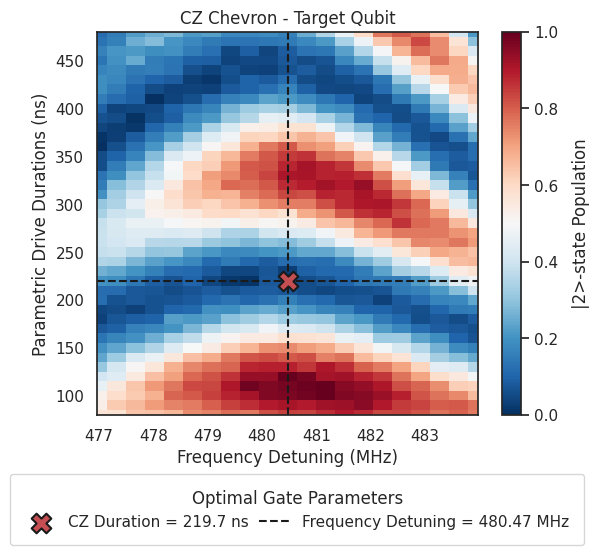

480.47 215.6006146737554


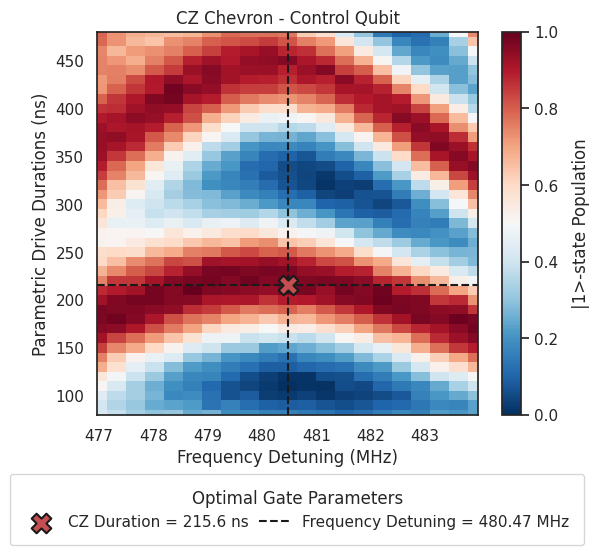

In [16]:
for qubit in ['q19','q20']:
    freq = ds[f'cz_pulse_frequenciesq19_q20'].values/1e6
    amp = ds[f'cz_pulse_durationsq19_q20'].values*1e9
    magnitudes = np.array([[np.linalg.norm(u) for u in v] for v in ds[f'y{qubit}']])
    magnitudes = np.transpose((magnitudes - np.min(magnitudes))/(np.max(magnitudes)-np.min(magnitudes)))
    fit_results = []
    for magnitude in magnitudes:
        model = ChevronModel()
        # magnitude = np.transpose(values)[15]
        fit_amplitudes = np.linspace( amp[0], amp[-1], 400)
        guess = model.guess(magnitude, drive_amp=amp)
        fit_result = model.fit(magnitude, params=guess, drive_amp=amp)
        fit_y = model.eval(fit_result.params, **{model.independent_vars[0]: fit_amplitudes})
        fit_results.append(fit_result)
        # plt.plot(y,magnitude,'.r')
        # plt.plot(fit_amplitudes,fit_y,'--b')
    qois = np.transpose([[np.abs(fit.result.params[p].value) for p in ['amplitude','duration']] for fit in fit_results])
    # print(qois)
    qois = np.transpose([(q-np.min(q))/np.max(q) for q in qois])
    opt_id = np.argmax(np.prod(qois,axis=1))
    if int(qubit[1:]) % 2 == 0:
        # opt_id = np.argmax(np.sum(qois,axis=1))
        qubit_type = 'Control'
    else:
        # opt_id = np.argmin(np.diff(qois,axis=1))
        qubit_type = 'Target'
    opt_freq = freq[opt_id]
    opt_cz = fit_results[opt_id].result.params['cz'].value
    opt_swap = fit_results[opt_id].result.params['swap'].value
    opt_id,opt_freq,opt_cz,opt_swap
    print(opt_freq,opt_cz)
    import seaborn as sns
    sns.set_theme(style="white")
    %matplotlib inline
    plt.figure(figsize=(6,6))
    fig = plt.pcolormesh(freq,amp,np.transpose(magnitudes),shading='nearest',cmap='RdBu_r')
    plt.scatter(opt_freq,opt_cz,c='r',label = 'CZ Duration = {:.1f} ns'.format(opt_cz),marker='X',s=200,edgecolors='k', linewidth=1.5,zorder=10)
    # plt.scatter(opt_swap,opt_freq,c='b',label = 'SWAP12 Duration= {:.2f} V'.format(opt_swap),marker='X',s=200,edgecolors='k', linewidth=1.5,zorder=10)
    plt.vlines(opt_freq,amp[0],amp[-1],label = 'Frequency Detuning = {:.2f} MHz'.format(opt_freq),colors='k',linestyles='--',linewidth=1.5)
    plt.hlines(opt_cz,freq[0],freq[-1],colors='k',linestyles='--',linewidth=1.5)

    plt.legend(loc = 'lower center', bbox_to_anchor=(-0.25, -0.36, 1.55, .102), mode='expand', ncol=2,
                title = 'Optimal Gate Parameters', columnspacing=200,borderpad=1)
    # plt.legend(loc = 'lower center', bbox_to_anchor=(-0.037, -0.3, 1.2, .102), mode='expand', ncol=3,
    #                     title = 'Optimal Gate Parameters', columnspacing=100,borderpad=1)
    cbar = plt.colorbar(fig)
    if qubit_type == 'Control':
        cbar.set_label('|1>-state Population', labelpad=10)
    else:
        cbar.set_label('|2>-state Population', labelpad=10)
    plt.xlim([freq[0],freq[-1]])
    plt.ylim([amp[0],amp[-1]])
    plt.ylabel('Parametric Drive Durations (ns)')
    plt.xlabel('Frequency Detuning (MHz)')
    plt.title(f'CZ Chevron - {qubit_type} Qubit')
    plt.tight_layout()
    plt.savefig(f'CZ Chevron {qubit}.png',dpi=300, bbox_inches='tight')
    plt.show()

## CZ calibration

In [162]:
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from numpy.linalg import inv
from quantify_core.analysis.fitting_models import fft_freq_phase_guess
from scipy.linalg import norm
from scipy.optimize import minimize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

from tergite_acl.config.coupler_config import qubit_types
from tergite_acl.lib.analysis_base import BaseAnalysis


# Cosine function that is fit to Rabi oscillations
def cos_func(
        drive_amp: float,
        frequency: float,
        amplitude: float,
        offset: float,
        phase: float = 0,
) -> float:
    return amplitude * np.cos(2 * np.pi * frequency * (drive_amp + phase)) + offset


def mitigate(v, cm_inv):
    u = np.dot(v, cm_inv)

    # print(u,np.sum(u))
    def m(t):
        return norm(u - np.array(t))

    def con(t):
        return t[0] + t[1] + t[2] - 1

    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x, 10))
    # print(w)
    return w


class CZModel(lmfit.model.Model):
    """
    Generate a cosine model that can be fit to Rabi oscillation data.
    """

    def __init__(self, *args, **kwargs):
        # Pass in the defining equation so the user doesn't have to later.
        super().__init__(cos_func, *args, **kwargs)

        # Enforce oscillation frequency is positive
        self.set_param_hint("frequency", min=0)

        # Fix the phase at pi so that the ouput is at a minimum when drive_amp=0
        self.set_param_hint("phase", min=-360, max=360)

        # Pi-pulse amplitude can be derived from the oscillation frequency

        # self.set_param_hint("swap", expr="1/(2*frequency)-phase", vary=False)
        self.set_param_hint("cz", expr="(2/(2*frequency)-phase)", vary=False)

    def guess(self, data, **kws) -> lmfit.parameter.Parameters:
        drive_amp = kws.get("drive_amp", None)
        if drive_amp is None:
            return None

        amp_guess = abs(max(data) - min(data)) / 2  # amp is positive by convention
        offs_guess = np.mean(data)

        # breakpoint()    

        # Frequency guess is obtained using a fast fourier transform (FFT).
        (freq_guess, _) = fft_freq_phase_guess(data, drive_amp)

        self.set_param_hint("frequency", value=freq_guess, min=freq_guess * 0.9)
        self.set_param_hint("amplitude", value=amp_guess, min=amp_guess * 0.9)
        self.set_param_hint("offset", value=offs_guess)

        params = self.make_params()
        return lmfit.models.update_param_vals(params, self.prefix, **kws)


class CZCalibrationAnalysis(BaseAnalysis):
    def __init__(self, dataset: xr.Dataset):
        super().__init__()
        data_var = list(dataset.data_vars.keys())[0]
        coord = list(dataset[data_var].coords.keys())[0]
        self.S21 = dataset[data_var].values
        self.independents = dataset[coord].values
        self.fit_results = {}
        self.qubit = dataset[data_var].attrs['qubit']

        measurements = np.array([[n[0]+1j*n[1] for n in m] for m in self.S21])
        # print(measurements)
        data = measurements[:-2]
        calibration_0 = measurements[-2]
        calibration_1 = measurements[-1]
        # print(calibration_0,calibration_1)
        displacement_vector = calibration_1 - calibration_0
        data_translated_to_zero = data - calibration_0

        rotation_angle = np.angle(displacement_vector)
        rotated_data = data_translated_to_zero * np.exp(-1j * rotation_angle)
        rotated_0 = calibration_0 * np.exp(-1j * rotation_angle)
        rotated_1 = calibration_1 * np.exp(-1j * rotation_angle)
        normalization = (rotated_1 - rotated_0).real
        real_rotated_data = rotated_data.real
        self.data =  real_rotated_data / normalization
        self.dataset = dataset

    def run_fitting(self):
        # self.testing_group = 0
        # self.dynamic = self.dataset.attrs['node'][:16] == 'cz_dynamic_phase'
        # self.swap = self.dataset.attrs['node'][-4:] == 'swap'

        self.dynamic = False
        self.swap = False
        qubit_type_list = ['Control','Target']
        if self.swap:
            qubit_type_list.reverse() 

        self.freq = self.dataset[f'control_ons{self.qubit}'].values
        self.amp = self.dataset[f'ramsey_phases{self.qubit}'].values[:-2]
        magnitudes = self.data
        self.magnitudes = np.transpose(magnitudes)
        # self.magnitudes = np.transpose((magnitudes - np.min(magnitudes))/(np.max(magnitudes)-np.min(magnitudes)))
        self.fit_amplitudes = np.linspace(self.amp[0], self.amp[-1], 400)

        self.fit_results, self.fit_ys = [], []

        try:
            for magnitude in self.magnitudes:
                if qubit_types[self.qubit] == qubit_type_list[1]:
                    fit = True
                    model = CZModel()
                    # magnitude = np.transpose(values)[15]
                    guess = model.guess(magnitude, drive_amp=self.amp)
                    fit_result = model.fit(magnitude, params=guess, drive_amp=self.amp)
                    fit_y = model.eval(fit_result.params, **{model.independent_vars[0]: self.fit_amplitudes})
                    self.fit_results.append(fit_result)
                else:
                    fit = False
                    fit_y = [np.mean(magnitude)] * 400
                self.fit_ys.append(fit_y)
            if fit:
                qois = np.transpose(
                    [[[fit.result.params[p].value, fit.result.params[p].stderr] for p in ['cz']] for fit in
                     self.fit_results])
                self.opt_cz = qois[0][0]+360
                self.cphase = 180 - np.abs(np.abs(np.diff(self.opt_cz))[0] - 180)
                # self.cphase = np.abs(np.diff(self.opt_cz))[0]
                print(qois)
                self.err = np.sqrt(np.sum(np.array(qois[1][0]) ** 2))
            else:
                self.cphase = 0
                self.err = 0
                self.opt_cz = [0] * 2
            if fit:
                qois = np.transpose(
                    [[[fit.result.params[p].value, fit.result.params[p].stderr] for p in ['amplitude']] for fit in
                     self.fit_results])
                self.pop_loss = np.diff(np.flip(qois[0][0]))[0]
            else:
                self.pop_loss = np.mean(np.diff(np.flip(self.fit_ys)))
        except:
            self.cphase = 0
            self.err = 0
            self.opt_cz = [0] * 2
            self.pop_loss = 0

        return [self.cphase, self.pop_loss]

    def plotter(self):
        # datarray = self.dataset[f'y{self.qubit}']
        # qubit = self.qubit

        if self.dynamic:
            label = ['Gate Off', 'Gate On']
            name = 'Dynamic Phase'
        else:
            label = ['Control Off', 'Control On']
            name = 'CZ'
        x = range(len(label))
        colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
        for index, magnitude in enumerate(self.magnitudes):
            plt.plot(self.amp, magnitude, '.', c=colors[index])
            plt.plot(self.fit_amplitudes, self.fit_ys[index], '-', c=colors[index], label=label[index])
            plt.vlines(self.opt_cz[index], -10, 10, colors='gray', linestyles='--', linewidth=1.5)

        plt.vlines(0, -10, -10, colors='gray', linestyles='--',
                    label='{:} = {:.1f}+/-{:.1f}'.format(name, self.cphase, self.err), zorder=-10)
        # axis.legend(loc = 'upper right')
        plt.xlim([self.amp[0], self.amp[-1]])
        plt.ylim(np.min(self.magnitudes), np.max(self.magnitudes))
        plt.xlabel('Phase (deg)')
        plt.ylabel('Population')
        plt.legend(loc = 'upper right')
        plt.title(f'{name} Calibration - {qubit_types[self.qubit]} Qubit {self.qubit[1:]}')
        plt.savefig(f'tergite_acl/notebooks/cz/'+ds.tuid+'_'+ds.name+'.png')


In [166]:
ds.tuid

'20240512-020948-774'

In [163]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
# import redis
import xarray as xr
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240510'
path = f'data_dir/{date}'
names = np.sort(listdir(path))
name = names[-1]
# name = '20240504-021939-178-f1ecca-cz_chevron'
# name = '20240511-122914-529-2bf902-cz_calibration'
print(name)
data_set_names = np.sort(listdir(path+'/'+name))[1:]
print(len(data_set_names))
dps = [f'data_dir/{date}/{name}/{data_set_name}' for data_set_name in data_set_names]
ds = load_dataset(dps[0])
ds


20240512-020948-774-e9c406-cz_calibration
1


<xarray.Dataset>
Dimensions:           (ramsey_phasesq19: 18, control_onsq19: 2, ReIm: 2,
                       ramsey_phasesq20: 18, control_onsq20: 2)
Coordinates:
  * ramsey_phasesq19  (ramsey_phasesq19) float64 0.0 48.0 96.0 ... 720.0 0.0 1.0
  * ramsey_phasesq20  (ramsey_phasesq20) float64 0.0 48.0 96.0 ... 720.0 0.0 1.0
  * control_onsq19    (control_onsq19) bool False True
  * control_onsq20    (control_onsq20) bool False True
Dimensions without coordinates: ReIm
Data variables:
    yq19              (ramsey_phasesq19, control_onsq19, ReIm) float64 -0.015...
    yq20              (ramsey_phasesq20, control_onsq20, ReIm) float64 -0.017...
Attributes:
    name:     cz_calibration
    tuid:     20240512-020948-774

[[[426.86490842 246.72258051]]

 [[  0.43607899   0.47105248]]]


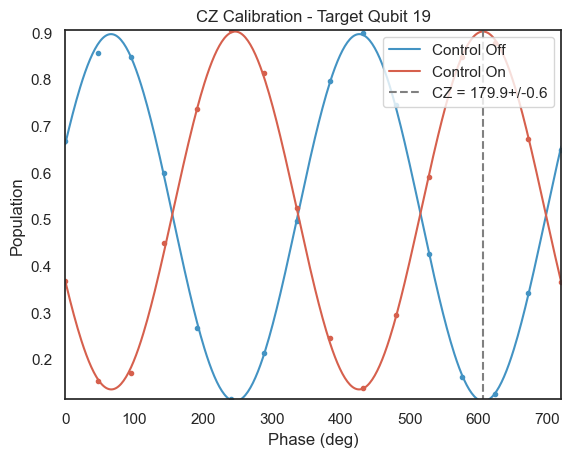

In [164]:
cz = CZCalibrationAnalysis(ds)
s21 = cz.run_fitting()
cz.plotter()
fig = plt.gcf()
fig.savefig(f'tergite_acl/notebooks/cz/.png')

## RB

In [126]:
"""
Module containing classes that model, fit and plot data from a Rabi experiment.
"""
import lmfit
import numpy as np
import xarray as xr
from matplotlib.axes import Axes
import seaborn as sns

from tergite_acl.lib.analysis_base import BaseAnalysis


def exponential_decay_function(m: float, p: float, A: float, B: float) -> float:
    return A * p ** m + B


class ExpDecayModel(lmfit.model.Model):
    """
    Generate an exponential decay model that can be fit to randomized benchmarking data.
    """

    def __init__(self, *args, **kwargs):
        super().__init__(exponential_decay_function, *args, **kwargs)

        self.set_param_hint("A", vary=True)
        self.set_param_hint("B", vary=True, min=-1)
        self.set_param_hint("p", vary=True, min=0)

    def guess(self, data, **kws) -> lmfit.parameter.Parameters:
        m = kws.get("m", None)

        if m is None:
            return None

        amplitude_guess = 1 / 2
        self.set_param_hint("A", value=amplitude_guess)

        offset_guess = data[-1]
        self.set_param_hint("B", value=offset_guess)

        p_guess = 0.95
        self.set_param_hint("p", value=p_guess)

        params = self.make_params()
        return lmfit.models.update_param_vals(params, self.prefix, **kws)


class RandomizedBenchmarkingAnalysis(BaseAnalysis):
    """
    Analysis that fits an exponential decay function to randomized benchmarking data.
    """

    def __init__(self, dataset: xr.Dataset,type: str):
        super().__init__()
        self.type = type
        norm_data_list = []
        std_data_list = []
        for qubit_idx in [0,1]:
            self.data_var = list(dataset.data_vars.keys())[qubit_idx]
            self.qubit = dataset[self.data_var].attrs['qubit']
            self.S21 = dataset[self.data_var]
            for coord in dataset[self.data_var].coords:
                if 'cliffords' in coord:
                    self.number_cliffords_coord = coord
                elif 'seed' in coord:
                    self.seed_coord = coord
            self.number_of_repetitions = dataset.dims[self.seed_coord]
            self.number_of_cliffords = dataset[self.number_cliffords_coord].values
            self.number_of_cliffords_runs = dataset.dims[self.number_cliffords_coord] - 2
            self.normalized_data_dict = {}
            rep_data_list = []
            for repetition_index in range(self.number_of_repetitions):
                complex_values = self.S21.isel(
                    {self.seed_coord: [repetition_index]}
                )
                # print(complex_values)
                measurements = complex_values.values.flatten()
                measurements = [ m[0]+1j*m[1] for m in measurements.reshape(11,2)]
                # print(measurements)
                self.measurements = measurements
                data = measurements[:-2]
                calibration_0 = measurements[-2]
                calibration_1 = measurements[-1]
                displacement_vector = calibration_1 - calibration_0
                data_translated_to_zero = data - calibration_0

                rotation_angle = np.angle(displacement_vector)
                rotated_data = data_translated_to_zero * np.exp(-1j * rotation_angle)
                rotated_0 = calibration_0 * np.exp(-1j * rotation_angle)
                rotated_1 = calibration_1 * np.exp(-1j * rotation_angle)
                normalization = (rotated_1 - rotated_0).real
                real_rotated_data = rotated_data.real
                rep_data = real_rotated_data / normalization
                rep_data = 1-2*rep_data+0.17
                rep_data_list.append(rep_data)
            rep_data = np.mean(rep_data_list,axis = 0)
            std_data = np.std(rep_data_list,axis = 0)
            norm_data_list.append(rep_data)
            std_data_list.append(std_data)
        
        self.norm_data_list = norm_data_list
        self.std_data_list = std_data_list
        # print(self.norm_data_list)
        # self.normalized_data_dict[repetition_index] = 1 - 2*self.normalized_data_dict[repetition_index]

        self.fit_results = {}
        
    def run_fitting(self):
        self.sum = np.mean(self.norm_data_list,axis = 0)
        self.sum_std = np.mean(self.std_data_list,axis = 0)
        # print(self.sum)
        # print(self.sum_std)
        # sum = np.sum([arr for arr in self.normalized_data_dict.values()], axis=0)
        # self.sum = sum / len(self.normalized_data_dict)
        
        model = ExpDecayModel()

        n_cliffords = self.number_of_cliffords[:-2]

        # Gives an initial guess for the model parameters and then fits the model to the data.
        guess = model.guess(data=self.sum, m=n_cliffords)
        # print(self.sum,n_cliffords)
        fit_result = model.fit(self.sum, params=guess, m=n_cliffords)

        self.fit_n_cliffords = np.linspace(n_cliffords[0], n_cliffords[-1], 400)
        self.fit_y = model.eval(fit_result.params, **{model.independent_vars[0]: self.fit_n_cliffords})
        self.fidelity = fit_result.params['p'].value
        return [self.fidelity]

    def plotter(self, prb = 1):
        # for repetition_index in range(self.number_of_repetitions):
        #     real_values = self.normalized_data_dict[repetition_index]
        # plt.plot(self.number_of_cliffords[:-2], self.sum, alpha=0.2)
        # plt.annotate(f'{repetition_index}', (self.number_of_cliffords[:-2][-1], real_values[-1]))
        # plt.hlines(0.25, self.number_of_cliffords[0], self.number_of_cliffords[-3], colors='gray', linestyles='--')
        if self.type == 'RB':
            plt.plot(self.number_of_cliffords[:-2], self.sum, 'b.',alpha = 0.5,label='RB Data')
            plt.fill_between(self.number_of_cliffords[:-2],self.sum-self.sum_std,self.sum+self.sum_std,color='b',alpha = 0.2)
            # plt.errorbar(self.number_of_cliffords[:-2], self.sum, self.sum_std,label='Data',linestyle='None',marker='.',c='Black', capsize=2, elinewidth=1, markeredgewidth=2)
            plt.plot(self.fit_n_cliffords, self.fit_y, 'b--', lw=2, label='$p_{RB}$ = '+ f'{self.fidelity:.3f}', )
        elif self.type == 'IRB':
            plt.plot(self.number_of_cliffords[:-2], self.sum, 'r.',alpha = 0.5,label='IRB Data')
            plt.fill_between(self.number_of_cliffords[:-2],self.sum-self.sum_std,self.sum+self.sum_std,color='r',alpha = 0.2)
            plt.plot(self.fit_n_cliffords, self.fit_y, 'r--', lw=2, label='$p_{IRB}$ = '+f'{self.fidelity:.3f}', ) 
            r = 3/4*(1-self.fidelity/prb)
            plt.plot(0, 0, '', label='Fidelity $f_{cz}$ = '+f'{1-r:.3f}', )  
        plt.ylabel("Expectation Value, <$\sigma_{z}\sigma_{z}$>")
        plt.grid(True)
        plt.xlabel('Number of Cliffords, m')
        plt.title('Two-qubit Randomized Benchmarking')
        plt.legend(loc = 'upper right')
        plt.ylim(0, 1)
        plt.xlim(1,64)
        # plt.xlim(min(self.fit_n_cliffords),max(self.fit_n_cliffords))


In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
# import redis
import xarray as xr
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240514'
path = f'data_dir/{date}'
names = np.sort(listdir(path))
# name = names[-1]
name = '20240514-011801-176-c85ecf-tqg_randomized_benchmarking'
# name = '20240514-105201-529-0faf76-tqg_randomized_benchmarking'
print(name)
data_set_names = np.sort(listdir(path+'/'+name))[:-1]
print(len(data_set_names))
dps = [f'data_dir/{date}/{name}/{data_set_name}' for data_set_name in data_set_names]
# ds = load_dataset(dps[0])
dss = [load_dataset(dp) for dp in dps]
ds = xr.merge(dss)

name = '20240514-014454-115-d7a88c-tqg_randomized_benchmarking_interleaved'
# name = '20240514-111859-500-be7e14-tqg_randomized_benchmarking_interleaved'
print(name)
data_set_names = np.sort(listdir(path+'/'+name))[:-1]
print(len(data_set_names))
dps = [f'data_dir/{date}/{name}/{data_set_name}' for data_set_name in data_set_names]
# ds = load_dataset(dps[0])
dss = [load_dataset(dp) for dp in dps]
ds1 = xr.merge(dss)

20240514-011801-176-c85ecf-tqg_randomized_benchmarking
100
20240514-014454-115-d7a88c-tqg_randomized_benchmarking_interleaved
100


/tmp/ipykernel_9643/1080284120.py:67: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.number_of_repetitions = dataset.dims[self.seed_coord]
/tmp/ipykernel_9643/1080284120.py:69: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.number_of_cliffords_runs = dataset.dims[self.number_cliffords_coord] - 2


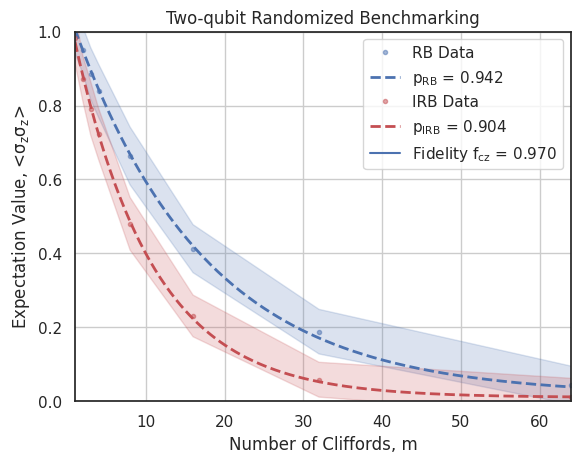

In [144]:
import seaborn as sns         
sns.set_theme(style="white")
params = {'mathtext.default': 'regular' } 
plt.rcParams.update(params)
rb = RandomizedBenchmarkingAnalysis(ds,'RB')
prb = rb.run_fitting()[0]
rb.plotter()
fig = plt.gcf()
irb = RandomizedBenchmarkingAnalysis(ds1,'IRB')
irb.run_fitting()
irb.plotter(prb)
fig1 = plt.gcf()
fig1.savefig(f'tergite_acl/notebooks/rb/{ds.tuid}_{ds1.tuid}.png',dpi=300, bbox_inches='tight')

## Coupler Spec

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv
from os import listdir
import os
import arrow
import seaborn as sns

In [46]:
def analyze_coupler_spectroscopy(date = None,qubits = ['q17','q18'],target = 0,flux = [-1.5,1.5], phi = 0.3,
                    name = None, idx = None):
    if date ==  None:
        if name == None:
            date = arrow.now().format('YYMMDD')
        else:
            date = name[:8]
    path = f'data_dir/{date}'
    names = np.sort(listdir(path))
    if name == None:
        name = names[-1]
    print(f"{name = }")
    dp = f'{path}/{name}/dataset.hdf5'
    ds = load_dataset(dp)
    print(ds)
    qubit = qubits[target]
    freq = ds[f'spec_frequencies{qubit}'].values/1e9
    dc2 = ds[f'currents{qubit}'].values*1e3
    if dc2 == [0]:
        dc2 = np.round(np.append(np.arange(0.1, 3.1, 0.1),np.arange(-3, 0.1, 0.1)),1)*1e-3
    ds = ds.sortby(f'currents{qubit}')
    print(dc2,freq)
    magnitudes = np.array([[np.linalg.norm(u) for u in v] for v in ds[f'y{qubit}']])
    plt.imshow(magnitudes, aspect='auto', extent=[np.min(dc2), np.max(dc2), freq[0], freq[-1]], origin='lower')
    peaks = np.argmax(magnitudes, axis=1)
    left,right = flux[0],flux[1]
    full = left-right
    zero = (left+right)/2
    bias = [phi*full+zero,-phi*full+zero]
    print(f"{bias = }")
    plt.vlines(left, freq[0], freq[-1], color='grey',linestyles='dashed')
    plt.vlines(right, freq[0], freq[-1], color='grey',linestyles='dashed',label=f'phi0={full:.2f}mA')
    plt.vlines(zero, freq[0], freq[-1], color='black',linestyles='dashed',label=f'zero={zero:.2f}mA')
    plt.vlines(bias[0], freq[0], freq[-1], color='red',linestyles='dashed',label='phi @ %1.0f = %1.0f mA'%(phi,bias[0]))
    plt.vlines(bias[1], freq[0], freq[-1], color='red',linestyles='dashed',label='phi @ %1.0f = %1.0f mA'%(phi,bias[1]))
    plt.plot([],[],alpha = 0,label=f'bias={bias[1]:.3f}mA')
    peak_freqs2 = freq[peaks]
    plt.plot(dc2, peak_freqs2,'.', color='red')
    plt.xlabel('DC current (mA)')
    plt.ylabel('Frequency (GHz)')
    plt.legend(loc='upper right')
    path = 'notebooks/images/coupler/'+date+'/'
    try:
        os.mkdir(path)
    except:
        pass
    plt.savefig(path+savename[0]+'.png',dpi=300)
    plt.show()

In [50]:
name = '20240429-211129-987-4dd2d5-coupler_spectroscopy'
date = name[:8]
path = f'data_dir/{date}'
names = np.sort(listdir(path))
if name == None:
    name = names[-1]
print(f"{name = }")
dp = f'{path}/{name}/dataset.hdf5'
ds = load_dataset(dp)

name = '20240429-211129-987-4dd2d5-coupler_spectroscopy'


In [51]:
ds

<xarray.Dataset> Size: 2kB
Dimensions:              (spec_frequenciesq19: 81, currentsq19: 1, ReIm: 2)
Coordinates:
  * spec_frequenciesq19  (spec_frequenciesq19) float64 648B 5.036e+09 ... 5.0...
  * currentsq19          (currentsq19) float64 8B 0.0
Dimensions without coordinates: ReIm
Data variables:
    yq19                 (spec_frequenciesq19, currentsq19, ReIm) float64 1kB ...
Attributes:
    name:     coupler_spectroscopy
    tuid:     20240429-211129-987

In [48]:
np.round(np.append(np.arange(0.1, 3.1, 0.1),np.arange(-3, 0.1, 0.1)),1)*1e-3

array([ 0.0001,  0.0002,  0.0003,  0.0004,  0.0005,  0.0006,  0.0007,
        0.0008,  0.0009,  0.001 ,  0.0011,  0.0012,  0.0013,  0.0014,
        0.0015,  0.0016,  0.0017,  0.0018,  0.0019,  0.002 ,  0.0021,
        0.0022,  0.0023,  0.0024,  0.0025,  0.0026,  0.0027,  0.0028,
        0.0029,  0.003 , -0.003 , -0.0029, -0.0028, -0.0027, -0.0026,
       -0.0025, -0.0024, -0.0023, -0.0022, -0.0021, -0.002 , -0.0019,
       -0.0018, -0.0017, -0.0016, -0.0015, -0.0014, -0.0013, -0.0012,
       -0.0011, -0.001 , -0.0009, -0.0008, -0.0007, -0.0006, -0.0005,
       -0.0004, -0.0003, -0.0002, -0.0001,  0.    ])

name = '20240429-211129-987-4dd2d5-coupler_spectroscopy'
<xarray.Dataset> Size: 2kB
Dimensions:              (spec_frequenciesq19: 81, currentsq19: 1, ReIm: 2)
Coordinates:
  * spec_frequenciesq19  (spec_frequenciesq19) float64 648B 5.036e+09 ... 5.0...
  * currentsq19          (currentsq19) float64 8B 0.0
Dimensions without coordinates: ReIm
Data variables:
    yq19                 (spec_frequenciesq19, currentsq19, ReIm) float64 1kB ...
Attributes:
    name:     coupler_spectroscopy
    tuid:     20240429-211129-987
[ 0.0001  0.0002  0.0003  0.0004  0.0005  0.0006  0.0007  0.0008  0.0009
  0.001   0.0011  0.0012  0.0013  0.0014  0.0015  0.0016  0.0017  0.0018
  0.0019  0.002   0.0021  0.0022  0.0023  0.0024  0.0025  0.0026  0.0027
  0.0028  0.0029  0.003  -0.003  -0.0029 -0.0028 -0.0027 -0.0026 -0.0025
 -0.0024 -0.0023 -0.0022 -0.0021 -0.002  -0.0019 -0.0018 -0.0017 -0.0016
 -0.0015 -0.0014 -0.0013 -0.0012 -0.0011 -0.001  -0.0009 -0.0008 -0.0007
 -0.0006 -0.0005 -0.0004 -0.0003 -0.00

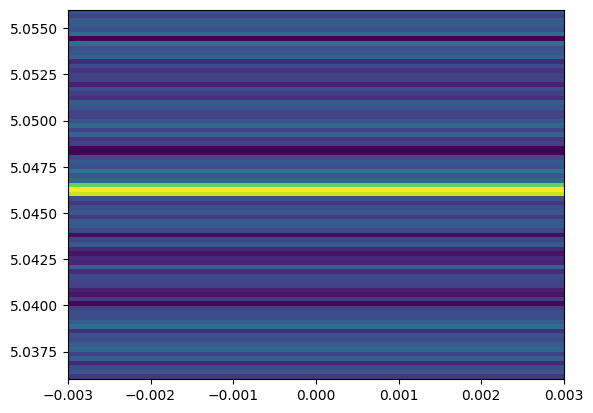

In [49]:
analyze_coupler_spectroscopy(date = None,target = 0,qubits = ['q19','q20'],name = '20240429-211129-987-4dd2d5-coupler_spectroscopy')

## Reset

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240202'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
# name = '20240131-180402-528-d9f087-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq16')
ds = ds.sortby('cz_pulse_amplitudesq21')

20240131-180402-528-d9f087-reset_chevron


In [ ]:
dataset = ds
qubit = 'q21'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values # ns

qubit = 'q16'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
qubit = 'q21'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmax(total_magnitude)
min_index = np.unravel_index(min_index, total_magnitude.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])

(0, 9)
-0.0805 1e-09


In [ ]:
min_index = [7,18]
print(min_index)
print(x[min_index[1]],y[min_index[0]])

[7, 18]
-0.07600000000000001 1.5000000000000002e-08


cz_pulse_durations = 1.5000000000000002e-08


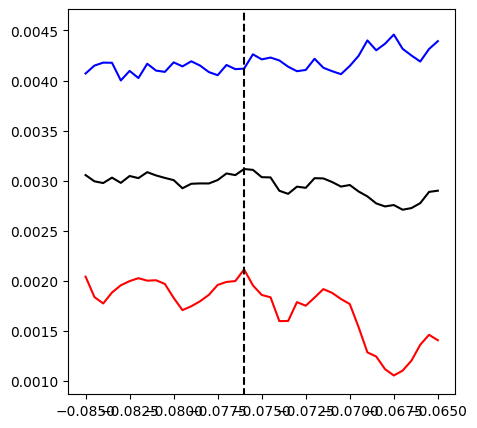

In [ ]:
%matplotlib inline
plot_index = min_index[0]
# plot_index = 4
print(f'cz_pulse_durations = {y[plot_index]}')
plt.figure(figsize=(5,5))
plt.plot(x, magnitudes0[plot_index],'-r')
plt.plot(x, magnitudes1[plot_index],'-b')
# plt.plot(x, total_magnitude[plot_index],'-k')
plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
plt.show()

cz_pulse_amplitudes = -0.07600000000000001


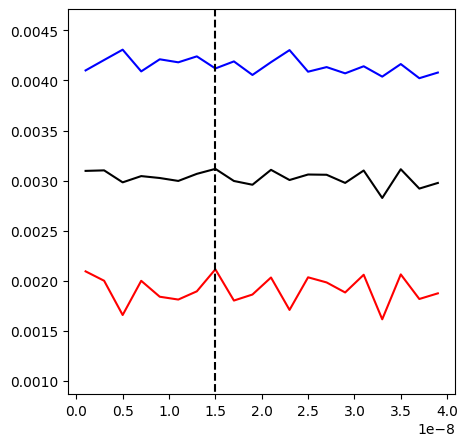

In [ ]:
%matplotlib inline
plot_index = min_index[1]
# plot_index = 12
print(f'cz_pulse_amplitudes = {x[plot_index]}')
plt.figure(figsize=(5,5))
plt.plot(y, magnitudes0.T[plot_index],'-r')
plt.plot(y, magnitudes1.T[plot_index],'-b')
# plt.plot(y, total_magnitude.T[plot_index],'-k')
plt.vlines(y[min_index[0]],0,1,colors='k',linestyles='dashed')
plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
plt.show()

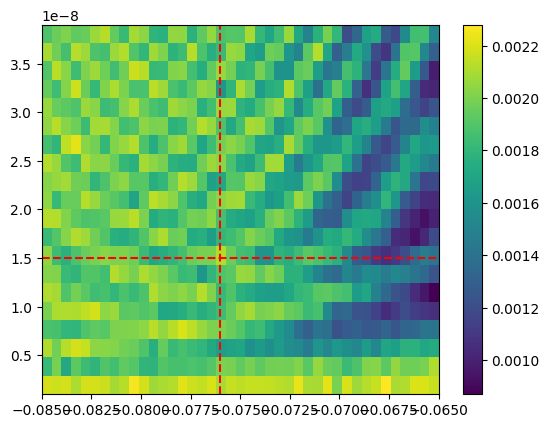

In [ ]:
plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
plt.imshow(magnitudes1, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

NameError: name 'state_coord' is not defined

## CZ_calibration Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20231231'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20231231-121410-941-404eaf-cz_calibration_ssro'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20231231-121410-941-404eaf-cz_calibration_ssro


assignment = 0.6695963541666666
assignment = 0.6549479166666666


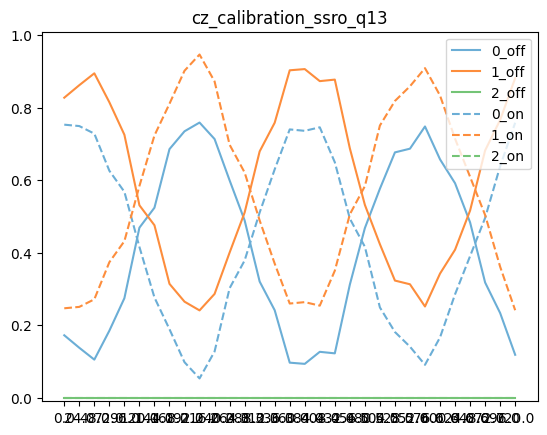

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

In [ ]:
np.diff(np.mean(magnitudes[:,:-3,2],axis = 1))

array([0.])

In [ ]:
colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
print(colors[1])

[0.4        0.74117647 0.38823529 1.        ]


In [ ]:
print(colors)

In [ ]:
magnitudes[:,:-3,0]

array([[0.95328687, 1.        , 0.97489076, 0.98119963, 0.95625897,
        0.97826324, 0.97291053, 0.99195332, 0.96982418, 1.        ,
        0.95966036, 0.95933393, 0.95112348, 0.99720885, 0.9554089 ,
        0.98439055, 0.93278169, 0.99826859, 1.        , 0.98239483,
        0.96128176, 0.93895345, 0.96381981, 0.98376218, 0.91227093,
        0.95988543, 0.95262008, 0.96938914, 0.97041375, 0.9554089 ,
        0.9835155 ],
       [0.57196983, 0.62658829, 0.55304507, 0.57090802, 0.56681152,
        0.57872153, 0.57781171, 0.55342449, 0.55171574, 0.56521868,
        0.57140295, 0.55482668, 0.53874458, 0.57462524, 0.63326385,
        0.51777045, 0.58888649, 0.56366518, 0.59009961, 0.56085663,
        0.57303289, 0.56764709, 0.57985954, 0.55793859, 0.61847084,
        0.53434505, 0.56776091, 0.55990903, 0.54272767, 0.61843364,
        0.58206046]])

In [ ]:
# %matplotlib inline
# qubit = 'q13'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.r')
# plt.show()

# qubit = 'q14'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.b')
# plt.show()

In [ ]:
# %matplotlib inline
# qubit = 'q13'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c0',control_onsq13=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c1',control_onsq13=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c2',control_onsq13=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

# %matplotlib inline
# qubit = 'q14'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c0',control_onsq14=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c1',control_onsq14=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c2',control_onsq14=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.36277471 -0.15911288 -0.20366183]
 [-0.29625934  1.42344841 -0.12718907]
 [-0.14756231 -0.02953404  1.17709634]]


## ro_amplitude_optimization_gef Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
name = '20231225-165135-093-09e0cd-cz_calibration_ssro'
dp = f'data_directory/{name[:8]}/{name}/dataset.hdf5'

In [ ]:
ds = load_dataset(dp)
ds

<xarray.Dataset>
Dimensions:           (shot: 1024, ramsey_phasesq14: 34, control_onsq14: 2,
                       ReIm: 2, ramsey_phasesq13: 34, control_onsq13: 2)
Coordinates:
  * shot              (shot) int32 0 1 2 3 4 5 ... 1018 1019 1020 1021 1022 1023
  * ramsey_phasesq14  (ramsey_phasesq14) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * ramsey_phasesq13  (ramsey_phasesq13) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * control_onsq14    (control_onsq14) bool False True
  * control_onsq13    (control_onsq13) bool False True
Dimensions without coordinates: ReIm
Data variables:
    yq14              (shot, ramsey_phasesq14, control_onsq14, ReIm) float64 ...
    yq13              (shot, ramsey_phasesq13, control_onsq13, ReIm) float64 ...
Attributes:
    name:     cz_calibration_ssro
    tuid:     20231225-165135-093

0.091


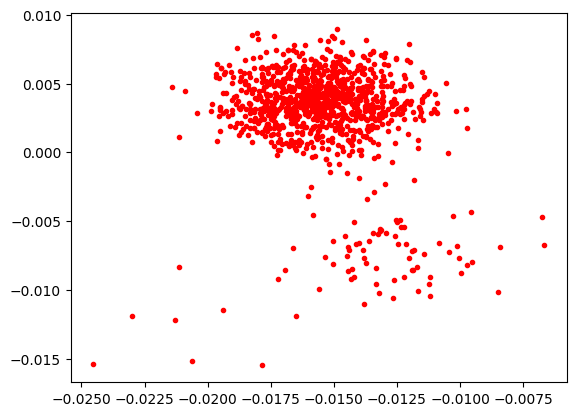

In [ ]:
%matplotlib inline
# select the data with ro_amplitudesq12 = 0.051
amp = ds.ro_amplitudesq12.values[5]
# for amp in ds.ro_amplitudesq12.values:
print(amp)
qubit = 'q130'
ds0 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 0 )
ds1 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 1 )
ds2 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 2 )
# ds0 = (ds0.values).reshape(4096*3,2)
# ds1 = (ds1.values).reshape(4096*3,2)
# ds2 = (ds2.values).reshape(4096*3,2)

cut0 = 0
cut1 = 15
plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds1[cut0::cut1,0].values,ds1[cut0::cut1,1].values,'*')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
plt.show()

assignment = 0.8388671875


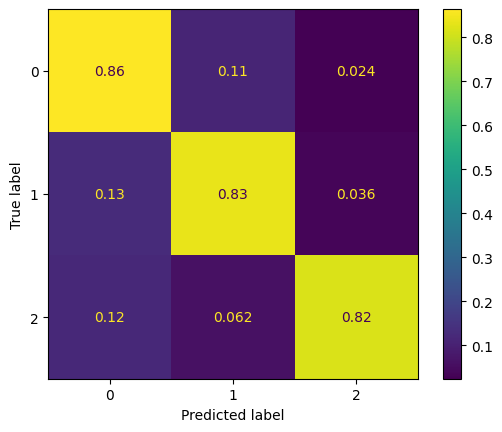

In [ ]:
import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset = ds
qubit = 'q12'
data_var = f'y{qubit}0'

for coord in dataset.coords:
    if f'amplitudes{qubit}' in str(coord):
        amplitude_coord = coord
    elif 'state' in str(coord):
        state_coord = coord
    elif 'shot' in str(coord):
        shot_coord = coord

independents = dataset[state_coord].values
amplitudes = dataset.coords[amplitude_coord]
shots = len(dataset[shot_coord].values)
fit_results = {}
# for indx, ro_amplitude in enumerate(amplitudes):
indx = 3
# print(f'{indx = }')
# print(f'{ro_amplitude.values = }')
y = np.repeat(independents,shots)
IQ_complex = np.array([])
for state in independents:
    IQ_complex_0 = dataset[data_var].isel({amplitude_coord:[indx],state_coord:state})
    IQ_complex = np.append(IQ_complex,IQ_complex_0)
# I = IQ_complex.real.flatten()
# Q = IQ_complex.imag.flatten()
# IQ = np.array([I,Q]).T
IQ = IQ_complex.reshape(-1,2)
lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
# breakpoint()
# print(IQ)
y_pred = lda.fit(IQ,y).predict(IQ)

cm = confusion_matrix(y,y_pred)
cm_norm = confusion_matrix(y,y_pred,normalize='true')
# assignment = 1 - 1/2 * (err_wr_0 + err_wr_1)
assignment = np.trace(cm_norm)/len(independents)
print(f'{assignment = }')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp.plot()
plt.show()

In [ ]:
from numpy.linalg import inv
print(cm_norm)
cm_inv = inv(cm_norm)
print(cm_inv)
print(np.dot(cm_inv,cm_norm))

[[0.86425781 0.11132812 0.02441406]
 [0.12890625 0.83496094 0.03613281]
 [0.12011719 0.0625     0.81738281]]
[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]
[[ 1.00000000e+00 -4.40186082e-17 -8.83285957e-18]
 [ 3.78725371e-17  1.00000000e+00  8.53131584e-18]
 [ 2.47198095e-17  0.00000000e+00  1.00000000e+00]]


In [ ]:
v = [0.87,0.11,1-0.87-0.11]
print(v)

[0.87, 0.11, 0.020000000000000004]


In [ ]:
def mitigated(v,a0,a1):
    return np.dot(cm_inv,v)-[a0,a1,1-a0-a1]
res = minimize(mitigated, v)


TypeError: mitigated() missing 2 required positional arguments: 'a0' and 'a1'

In [ ]:
a,b = 0.8,0.1
v = [a,b,1-a-b]
u = np.dot(cm_inv,v)
print(v,u,np.sum(u))

[0.8, 0.05, 0.14999999999999997] [ 0.93534224 -0.08680117  0.05269794] 0.9012390169552309


In [ ]:
# Define the function to be minimized
from scipy.linalg import norm
def m(t):
    return norm(u-np.array(t))

In [ ]:
# Define the constraints
def con(t):
   return t[0]+t[1]+t[2]-1
# Define the constraints in the form required by the minimize function
cons = ({'type': 'eq', 'fun': con},
        {'type': 'ineq', 'fun': lambda t: t[0]},
        {'type': 'ineq', 'fun': lambda t: t[1]},
        {'type': 'ineq', 'fun': lambda t: t[2]})

In [ ]:
from scipy.optimize import minimize
result = minimize(m, v, method='SLSQP', constraints=cons)
print(np.abs(np.round(result.x,10)))

[0.94132282 0.         0.05867718]


In [ ]:
cm_inv

array([[ 1.18425448, -0.1557683 , -0.02848618],
       [-0.17588313,  1.22477137, -0.04888825],
       [-0.16058158, -0.0707597 ,  1.23134128]])

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

1.1842544812150915,-0.15576829843331808,-0.028486182781773627,-0.1758831264569345,1.2247713733537886,-0.04888824689685401,-0.1605815783706242,-0.07075969795381643,1.2313412763244407


In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]


## Redis Parameters

In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
node = 'cz_chevron'
# qubits = ['q21','q22','q21_q22']
qubits = ['q21']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"cs:{qubit}")
    # Print the redis config line by line
    print(redis_config['cz_chevron'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q21:
not_calibrated


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = ['q13','q14']
qubits = ['q21_q22','q16_q21']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"couplers:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['cz_pulse_frequency'])
    print(redis_config['cz_pulse_duration'])
    print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21_q22:
215627272.72727272
3.313354605772508e-07
0.15
Qubit parameters q16_q21:
344000000.0
3.7186273915678165e-07
0.1


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q21','q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")
    # print(redis_config['cz_pulse_frequency'])
    # print(redis_config['cz_pulse_duration'])
    # print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21:
resonator_minimum_1: 6752486342.162048
ro_freq_1_backup: nan
reset_leakage: nan
cz_leakage: nan
ro_freq: 6752763432.928663
ro_pulse_duration: 3e-06
spec_ampl_default: 0.0003
ro_ampl_opt: 0.013000000000000001
spec_pulse_duration: 5e-06
cz_pulse_amplitude: nan
fidelity: nan
mw_ef_amp180: 0.11446605070998332
anharmonicity: nan
cz_pulse_duration: nan
t2_echo_time: nan
selectivity: nan
ro_freq_1: 6752487847.575863
ro_acq_delay: 2.2e-07
att: 0
mw_amp180_backup: nan
ro_freq_opt_backup: nan
cz_pulse_frequency: nan
cz_pop_loss: nan
Ql: 12054.248517286636
resonator_minimum_1_backup: nan
ro_freq_backup: nan
mw_motzoi: 0.033333333333333326
mw_pulse_duration: 2e-08
mw_amp180: 0.10184491770717556
cz_pulse_width: nan
mw_motzoi_backup: nan
reset_duration_qc: nan
inv_cm_opt: 1.1226039356631239,-0.08314853049884019,-0.03945540516428335,-0.15964734521169482,1.7178761693558662,-0.5582288241441716,-0.15638461930616093,-0.8923045550712444,2.0486891743774054
Ql_1: 11041.058172230927
res

In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q12','q13','q14','q15']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q12:
3366985350.8172603
3173745577.505435
Qubit parameters q13:
3583392807.127604
3344617330.110173
Qubit parameters q14:
3333262125.7570114
3133075732.4790416
Qubit parameters q15:
3872762251.21086
3631663526.956842


## Save VNA values

In [101]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = [ 'q12','q13','q14','q15']
qubits = ['q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['clock_freqs:readout'])
    print(redis_config['clock_freqs:f01'])
    # print(redis_config['clock_freqs:f12'])
    # qubit_freq_ro_list[qubit] = redis_config['clock_freqs:readout']
    # qubit_freq_01_list[qubit] = redis_config['clock_freqs:f01']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f12']
    # qubit_freq_12_list[qubit] = redis_config['clock_freqs:f01']

Qubit parameters q16:
6519447559.757598
4151000000.0
Qubit parameters q17:
7155389971.012634
5317000000.0
Qubit parameters q18:
6686259671.686979
4739000000.0
Qubit parameters q19:
6928059415.48827
5010500000.0
Qubit parameters q20:
6678811460.04715
4300000000.0
Qubit parameters q21:
7157387896.154296
5115500000.0
Qubit parameters q22:
6704570028.309857
4625500000.0
Qubit parameters q23:
6751912322.179543
5176666666.666667
Qubit parameters q24:
6307979570.1058855
4534000000.0
Qubit parameters q25:
7098352461.236609
5213000000.0


In [ ]:
for qubit in qubits:
    d = float(qubit_freq_ro_list[qubit]) - (float(qubit_freq_01_list[qubit])+float(qubit_freq_12_list[qubit]))
    print(d/1e6)

307.3397968161507
-572.6001307877655
401.3421511736212
-777.8378519722243
29.43924152974224
-562.4636578379517
20.548475479722022
-532.777912630641
240.17673071382904
-925.0276451222992


In [33]:
from tergite_acl.config.VNA_LOKIB_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
# rewrite the VNA_values.py file
with open('config/VNA_LOKIB_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")

In [35]:
import numpy as np
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
# anahar = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
# print(anahar)

{'q06': 6833000000, 'q07': 7259000000, 'q08': 6392000000, 'q09': 7269000000, 'q10': 7087000000, 'q11': 6988000000, 'q12': 6438000000, 'q13': 7237000000, 'q14': 6596000000, 'q15': 7120000000, 'q16': 6519441958.239083, 'q17': 7155392831.918434, 'q18': 6686265221.120888, 'q19': 6928064288.763453, 'q20': 6678816790.502101, 'q21': 7098356420.920728, 'q22': 6704573843.302045, 'q23': 6751926623.795597, 'q24': 6307978375.322713, 'q25': 7157388073.503611}
{'q06': 4400000000, 'q07': 4800000000, 'q08': 4100000000, 'q09': 5100000000, 'q10': 4400000000, 'q11': 4900000000, 'q12': 4200000000, 'q13': 5000000000, 'q14': 4300000000, 'q15': 4900000000, 'q16': 4348665965.012221, 'q17': 5316738467.893348, 'q18': 4611904952.765134, 'q19': 5017782420.527518, 'q20': 4300176736.695439, 'q21': 5156535148.11715, 'q22': 4494214245.042077, 'q23': 5031650613.904923, 'q24': 4379185892.173868, 'q25': 5220057554.504263}
{'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.3

In [ ]:
# VNA_resonator_frequencies = {'q11': 6934572785.610347, 'q12': 6606753684.764918, 'q13': 6688313321.558435, 'q14': 6331351280.923618, 'q15': 6933698139.447023, 'q16': 6491000000.0, 'q17': 7059000000.0, 'q18': 6712000000.0, 'q19': 6818000000.0, 'q20': 6494000000.0, 'q21': 6751000000.0, 'q22': 6477000000.0, 'q23': 7052000000.0, 'q24': 6583000000.0, 'q25': 6853000000.0}
# VNA_qubit_frequencies = {'q11': 3714895945.38633, 'q12': 3366961177.836733, 'q13': 3585016857.038436, 'q14': 3334060710.6204877, 'q15': 3872936707.280074, 'q16': 3189000000.0, 'q17': 3932000000.0, 'q18': 3254000000.0, 'q19': 3921000000.0, 'q20': 3333000000.0, 'q21': 3773000000.0, 'q22': 3326000000.0, 'q23': 3911000000.0, 'q24': 3271000000.0, 'q25': 4009000000.0}
# VNA_f12_frequencies = {'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.376709, 'q15': 3631763299.7146664, 'q16': 2993000000.0, 'q17': 3699000000.0, 'q18': 3154000000.0, 'q19': 3682000000.0, 'q20': 3233000000.0, 'q21': 3542000000.0, 'q22': 3131000000.0, 'q23': 3674000000.0, 'q24': 3171000000.0, 'q25': 3770000000.0}
